<font color="#279D9F"><h1 align="center">Máster en Big Data y Data Science</h1></font>
<font color="#6E6E6E"><h2 align="center">Fundamentos: Lenguajes - Librerías básicas de Python</h2></font>
<font color="#279D9F"><h3 align="center">Luis Fernándo Lago Fernández - Universidad Autónoma de Madrid</h2></font>

## Práctica 2: Análisis de datos con pandas

En esta práctica vamos a desarrollar código Python que, utilizando las librerías pandas y matplotlib, nos permita cargar un fichero de datos en formato csv en un *DataFrame*. En el *DataFrame*, al igual que en el fichero de entrada, cada columna representará una variable y cada fila una observación. El fichero de entrada podrá tener o no una primera línea (*header*) con los nombres de las variables. Una vez cargados los datos, debe ser posible realizar las siguientes operaciones:

- Calcular estadísticas básicas sobre los datos y almacenar las mismas en un *DataFrame*.
- Detectar elementos duplicados.
- Mostrar gráficas descriptivas de cada una de las variables.

Al final de la práctica se incluye también un ejercicio de operaciones vectoriales con NumPy.

A continuación se describe detalladamente y se muestran ejemplos de cada una de las tareas a realizar. Todo el código que desarrolles para responder a los ejercicios lo debes incluir en el fichero **data_analysis.py**, en los lugares indicados.

**Nota sobre la corrección:** La corrección se hará en gran medida de manera automática, por tanto debes asegurarte de que tu código se ajusta a las especificaciones indicadas y de que tus resultados respetan fielmente el formato de salida de los ejemplos.

La entrega se realizará antes de las **23:59** del día **01/12/2017**, a través de la plataforma moodle. Debes subir a moodle únicamente el fichero **data_analysis.py**.

## 1. Carga de datos

Completa en el fichero *data_analysis.py* la función *load_data*, que recibirá los siguientes argumentos:

- *inputFile:* El nombre del fichero csv que contiene los datos.
- *delimiter:* El carácter que delimita los datos. Por defecto la función deberá usar el carácter coma (",").
- *nan:* Una lista de *Strings* que serán tratados como *missing values*. Cualquier aparición en el fichero de entrada de una de las cadenas en esta lista se interpretará como un *NaN*. El valor por defecto será *None*.
- *header:* Un flag booleano que indicará si el fichero contiene cabecera (*True*) o si no (*False*). Por defecto debe ser *True*.
- *varNames:* Una lista de *Strings* que se usarán como nombres de las variables sólo en el caso en el que *header* valga *False*. El valor por defecto será *None*.
- *pref:* Un string que se usará como prefijo para los nombres de las variables sólo en el caso en el que *header* valga *False* y no se haya definido la lista *varNames*. Por ejemplo, si pref = "x", los nombres de las variables serán "x0", "x1", "x2", etc. El valor por defecto será "var_".

La función devolverá un *DataFrame* con los datos leídos del fichero.

Internamente, la función *load_data* tan solo debe encapsular una llamada a la función <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html">pandas.read_csv</a> de pandas con los parámetros apropiados para conseguir los objetivos deseados. Echa un vistazo a la documentación de esta función antes de empezar a trabajar.

A continuación se muestran algunos ejemplos de cómo debe comportarse la función con distintos parámetros de entrada. 

In [1]:
# Cargamos el módulo: 
import data_analysis as da

In [2]:
# Cargar el fichero small.csv especificando los nombres de las columnas:
fname = "p2/small.csv"
sep = ","
vars = ["x1", "x2", "x3", "x4", "x5", "x6"]
na_values = ["?", "none"]

df = da.load_data(fname, delimiter = sep, nan = na_values, 
                  header = False, varNames = vars)
df

,x1,x2,x3,x4,x5,x6
0,1,4.0,NaN,NaN,NaN,NaN
1,2,2.0,3.0,NaN,NaN,38.0
2,2,2.5,2.5,NaN,tc,39.0


In [3]:
# Cargar el fichero small.csv especificando prefijo para los nombres 
# de las columnas:
fname = "p2/small.csv"
sep = ","
prefix = "col_"
na_values = ["?", "none"]

df = da.load_data(fname, delimiter = sep, nan = na_values, 
                  header = False, pref = prefix)
df

,col_0,col_1,col_2,col_3,col_4,col_5
0,1,4.0,NaN,NaN,NaN,NaN
1,2,2.0,3.0,NaN,NaN,38.0
2,2,2.5,2.5,NaN,tc,39.0


In [4]:
# Cargar el fichero small.csv con nombres de columna por defecto:
fname = "p2/small.csv"
sep = ","
na_values = ["?", "none"]

df = da.load_data(fname, delimiter = sep, nan = na_values, 
                  header = False)
df

,var_0,var_1,var_2,var_3,var_4,var_5
0,1,4.0,NaN,NaN,NaN,NaN
1,2,2.0,3.0,NaN,NaN,38.0
2,2,2.5,2.5,NaN,tc,39.0


In [5]:
# Cargar el fichero adult.csv con nombres de columna por defecto:
fname = "p2/adult.csv"
sep = ","
na_values = [" ?"]

df = da.load_data(fname, delimiter = sep, nan = na_values, 
                  header = False)
df[:10]

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
# Cargar el fichero labor.csv con nombres de columna por defecto:
fname = "p2/labor.csv"
sep = ","
na_values = ["?"]

df = da.load_data(fname, delimiter = sep, nan = na_values, 
                  header = False)
df[:10]

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16
0,1.0,5.0,NaN,NaN,NaN,40.0,NaN,NaN,2.0,NaN,11.0,average,NaN,NaN,yes,NaN,good
1,2.0,4.5,5.8,NaN,NaN,35.0,ret_allw,NaN,NaN,yes,11.0,below average,NaN,full,NaN,full,good
2,NaN,NaN,NaN,NaN,NaN,38.0,empl_contr,NaN,5.0,NaN,11.0,generous,yes,half,yes,half,good
3,3.0,3.7,4.0,5.0,tc,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,yes,NaN,good
4,3.0,4.5,4.5,5.0,NaN,40.0,NaN,NaN,NaN,NaN,12.0,average,NaN,half,yes,half,good
5,2.0,2.0,2.5,NaN,NaN,35.0,NaN,NaN,6.0,yes,12.0,average,NaN,NaN,NaN,NaN,good
6,3.0,4.0,5.0,5.0,tc,NaN,empl_contr,NaN,NaN,NaN,12.0,generous,yes,none,yes,half,good
7,3.0,6.9,4.8,2.3,NaN,40.0,NaN,NaN,3.0,NaN,12.0,below average,NaN,NaN,NaN,NaN,good
8,2.0,3.0,7.0,NaN,NaN,38.0,NaN,12.0,25.0,yes,11.0,below average,yes,half,yes,NaN,good
9,1.0,5.7,NaN,NaN,none,40.0,empl_contr,NaN,4.0,NaN,11.0,generous,yes,full,NaN,NaN,good


In [7]:
# Cargar el fichero labor_header.csv:
fname = "p2/labor_header.csv"
sep = ","
na_values = ["?"]

df = da.load_data(fname, delimiter = sep, nan = na_values)
df[:10]

,dur,wage1,wage2,wage3,cola,hours,pension,stby_pay,shift_diff,educ_allw,holidays,vacation,ldisab,dntl,ber,hplan,agr
0,2.0,4.5,4.0,NaN,NaN,40.0,NaN,NaN,2.0,no,10.0,below average,no,half,NaN,half,bad
1,2.0,2.0,2.0,NaN,none,40.0,none,NaN,NaN,no,11.0,average,yes,none,yes,full,bad
2,3.0,4.0,5.0,5.0,tc,NaN,empl_contr,NaN,NaN,NaN,12.0,generous,yes,none,yes,half,good
3,1.0,2.0,NaN,NaN,tc,40.0,ret_allw,4.0,0.0,no,11.0,generous,no,none,no,none,bad
4,1.0,6.0,NaN,NaN,NaN,38.0,NaN,8.0,3.0,NaN,9.0,generous,NaN,NaN,NaN,NaN,good
5,2.0,2.5,3.0,NaN,tcf,40.0,none,NaN,NaN,NaN,11.0,below average,NaN,NaN,yes,NaN,bad
6,3.0,2.0,3.0,NaN,tcf,NaN,empl_contr,NaN,NaN,yes,NaN,NaN,yes,half,yes,NaN,good
7,1.0,2.1,NaN,NaN,tc,40.0,ret_allw,2.0,3.0,no,9.0,below average,yes,half,NaN,none,bad
8,1.0,2.8,NaN,NaN,none,38.0,empl_contr,2.0,3.0,no,9.0,below average,yes,half,NaN,none,bad
9,1.0,5.7,NaN,NaN,none,40.0,empl_contr,NaN,4.0,NaN,11.0,generous,yes,full,NaN,NaN,good


## 2. Cálculo de estadísticas

La siguiente tarea es completar en el fichero *data_analysis.py* la función *compute_statistics*, que  recibirá como único argumento el *DataFrame* que contiene los datos (tal y como lo devuelve la función *load_data*) y devolverá otro *DataFrame* en el que cada fila hace referencia a una variable (los nombres de las variables serán los índices de las filas) y las columnas contienen la siguiente información (calculada para cada variable):

- El número de valores válidos (aquellos que no son *NaN*).
- El número de valores missing (aquellos que son *NaN*).
- El número total de valores.
- El número de valores únicos.
- El número de valores únicos que no son *NaN*.
- El tipo de dato de la variable.

Además, si la variable es numérica se calcularán e incluirán las siguientes estadísticas:

- Valor medio.
- Desviación estándar.
- Valor mínimo.
- Valor máximo.

Para el cálculo de las cuatro últimas estadísticas se deben excluir los *missing values*. Si la variable no es numérica los datos anteriores se dejarán vacíos.

A continuación se muestran algunos ejemplos.

In [8]:
# Cargar el fichero small.csv con nombres de columna por defecto:
fname = "p2/small.csv"
sep = ","
na_values = ["?", "none"]

df = da.load_data(fname, delimiter = sep, nan = na_values, header = False)

In [9]:
# Calcular y mostrar las estadísticas:
stats = da.compute_statistics(df)
stats

,count,nan,total,unique,unique_not_nan,dtype,mean,std,min,max
var_0,3,0,3,2,2,int64,1.666667,0.577350,1.0,2.0
var_1,3,0,3,3,3,float64,2.833333,1.040833,2.0,4.0
var_2,2,1,3,3,2,float64,2.750000,0.353553,2.5,3.0
var_3,0,3,3,1,0,float64,NaN,NaN,NaN,NaN
var_4,1,2,3,2,1,object,NaN,NaN,NaN,NaN
var_5,2,1,3,3,2,float64,38.500000,0.707107,38.0,39.0


In [10]:
# Cargar el fichero labor_header.csv:
fname = "p2/labor_header.csv"
sep = ","
na_values = ["?"]

df = da.load_data(fname, delimiter = sep, nan = na_values)

In [11]:
# Calcular y mostrar las estadísticas:
stats = da.compute_statistics(df)
stats

,count,nan,total,unique,unique_not_nan,dtype,mean,std,min,max
dur,63,1,64,4,3,float64,2.142857,0.737414,1.0,3.0
wage1,63,1,64,18,17,float64,3.741270,1.406968,2.0,7.0
wage2,50,14,64,16,15,float64,3.894000,1.146852,2.0,7.0
wage3,15,49,64,10,9,float64,3.913333,1.304315,2.0,5.1
cola,43,21,64,4,3,object,NaN,NaN,NaN,NaN
hours,55,9,64,9,8,float64,38.145455,2.452649,27.0,40.0
pension,34,30,64,4,3,object,NaN,NaN,NaN,NaN
stby_pay,10,54,64,8,7,float64,6.900000,5.043147,2.0,14.0
shift_diff,34,30,64,11,10,float64,4.764706,4.348868,0.0,25.0
educ_allw,26,38,64,3,2,object,NaN,NaN,NaN,NaN


In [12]:
# Cargar el fichero adult.csv con nombres de columna por defecto:
fname = "p2/adult.csv"
sep = ","
na_values = [" ?"]

df = da.load_data(fname, delimiter = sep, nan = na_values, header = False)

In [13]:
# Calcular y mostrar las estadísticas:
stats = da.compute_statistics(df)
stats

,count,nan,total,unique,unique_not_nan,dtype,mean,std,min,max
var_0,32561,0,32561,73,73,int64,38.581647,13.640433,17.0,90.0
var_1,30725,1836,32561,9,8,object,NaN,NaN,NaN,NaN
var_2,32561,0,32561,21648,21648,int64,189778.366512,105549.977697,12285.0,1484705.0
var_3,32561,0,32561,16,16,object,NaN,NaN,NaN,NaN
var_4,32561,0,32561,16,16,int64,10.080679,2.572720,1.0,16.0
var_5,32561,0,32561,7,7,object,NaN,NaN,NaN,NaN
var_6,30718,1843,32561,15,14,object,NaN,NaN,NaN,NaN
var_7,32561,0,32561,6,6,object,NaN,NaN,NaN,NaN
var_8,32561,0,32561,5,5,object,NaN,NaN,NaN,NaN
var_9,32561,0,32561,2,2,object,NaN,NaN,NaN,NaN


## 3. Detección de filas duplicadas

Completa en el fichero *data_analysys.py* la función *detect_duplicates*, que recibe como único argumento el *DataFrame* que contiene los datos (tal y como lo devuelve la función *load_data*) y devuelve otro *DataFrame* con las filas que aparecen repetidas:

- El nuevo *DataFrame* tendrá una fila por cada fila que aparezca más de una vez en el *DataFrame* original. 
- El índice de una fila en el nuevo *DataFrame* será el índice de la primera aparición de dicha fila en el *DataFrame* original.
- Las columnas del nuevo *DataFrame* serán las mismas que las del *DataFrame* original.
- Además se añadirá una nueva columna al final, con el nombre *num_reps*, que contendrá, para cada fila, el número de veces que dicha fila se repite.

A continuación se muestra un ejemplo.

In [14]:
# Cargar el fichero labor_header.csv y seleccionar las primeras 9 columnas:
fname = "p2/labor_header.csv"
sep = ","
na_values = ["?"]
df = da.load_data(fname, delimiter = sep, nan = na_values)
df = df.ix[:,:9]

# Mostrar información acerca de las filas repetidas:
reps = da.detect_duplicates(df)
reps

,dur,wage1,wage2,wage3,cola,hours,pension,stby_pay,shift_diff,num_reps
6,3.0,2.0,3.0,NaN,tcf,NaN,empl_contr,NaN,NaN,4
8,1.0,2.8,NaN,NaN,none,38.0,empl_contr,2.0,3.0,2
9,1.0,5.7,NaN,NaN,none,40.0,empl_contr,NaN,4.0,3
43,2.0,2.5,3.0,NaN,NaN,40.0,none,NaN,NaN,2


En el ejemplo, se observa que la fila 6 aparece repetida 4 veces, la fila 8 aparece 2 veces, etc.  

## 4. Representación gráfica

Completa en el fichero *data_analysys.py* las funciones *plot_bars*, *plot_histogram* y *plot_scatter*. 

- La función *plot_bars* recibe una *Serie* con datos **no numéricos** y dibuja un diagrama de barras horizontales que muestra el número de veces que se repite cada valor en la *Serie*, ignorando *missing values*.

- La función *plot_histogram* recibe una *Serie* con datos **numéricos** y dibuja un histograma. Para calcular el histograma se deben ignorar todos los puntos cuya distancia al promedio sea mayor de 3 desviaciones estándar (estos puntos se consideran *outliers*). El número de cajas del histograma debe ser el mínimo entre 100 y el cociente entre el número de puntos (descontando *missing values* y *outliers*) y 20 (redondeando hacia arriba).

- La función *plot_scatter* recibe dos *Series* x e y, con valores **numéricos**, y dibuja un gráfico de dispersión de y frente a x. 

La llamada a las funciones anteriores se realiza desde la función *plot_data* (que **no debes modificar**). Esta función recibe un *DataFrame* con los datos y uno o dos argumentos adicionales que representan columnas en el *DataFrame*. En función del número y tipo de estos argumentos *plot_data* invoca a una u otra de las funciones anteriores.

A continuación se muestran ejemplos.

In [15]:
# Establecemos el estilo para los gráficos y el modo inline: 
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [16]:
# Cargar el fichero labor_header.csv:
fname = "p2/labor_header.csv"
sep = ","
na_values = ["?"]
df = da.load_data(fname, delimiter = sep, nan = na_values)

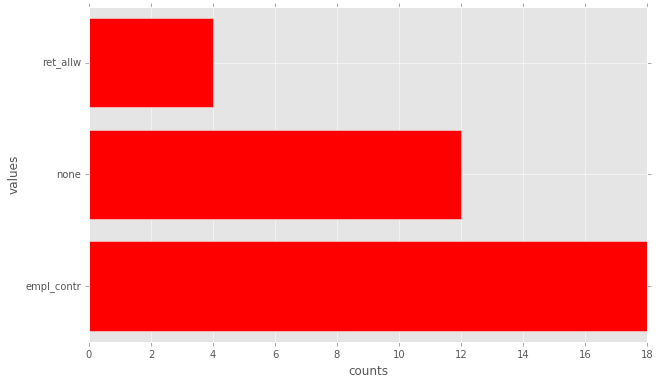

In [17]:
# Con una variable no numérica, plot_data muestra un gráfico de barras:
da.plot_data(df, "pension")

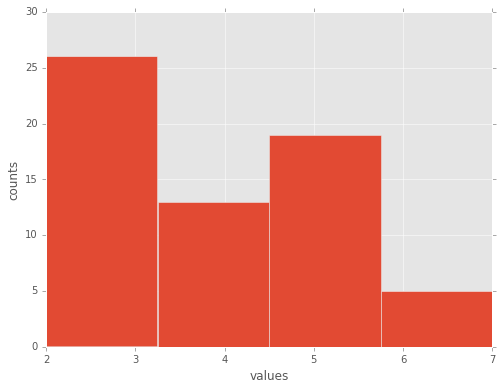

In [18]:
# Con una variable numérica, plot_data muestra un histograma:
da.plot_data(df, "wage1")

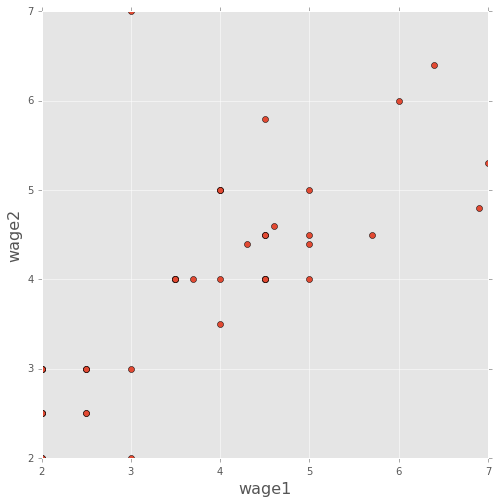

In [19]:
# Con dos variables numéricas, plot_data muestra un diagrama de dispersión:
da.plot_data(df, "wage1", "wage2")

In [20]:
# Cargar el fichero adult.csv con nombres de columna por defecto:
fname = "p2/adult.csv"
sep = ","
na_values = [" ?"]
df = da.load_data(fname, delimiter = sep, nan = na_values, header = False)

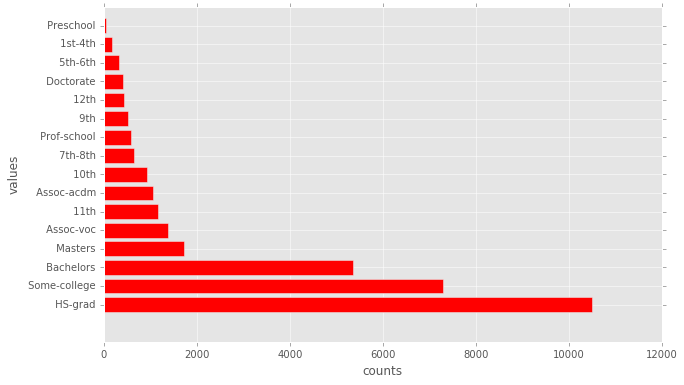

In [21]:
# Con una variable no numérica, plot_data muestra un gráfico de barras:
da.plot_data(df, 'var_3')

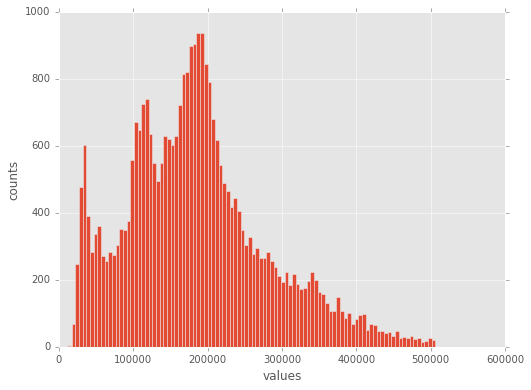

In [22]:
# Con una variable numérica, plot_data muestra un histograma:
da.plot_data(df, "var_2")

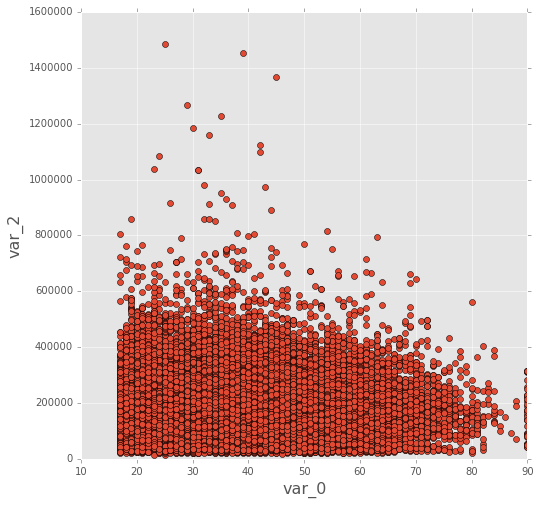

In [23]:
# Con dos variables numéricas, plot_data muestra un diagrama de dispersión:
da.plot_data(df, 'var_0', 'var_2')

## 5. Operaciones vectoriales con NumPy

Por último, completa en el fichero *data_analysys.py* las funciones *compute_distances* y *compute_distances_vect*, que calculan distancias entre vectores. Ambas funciones tienen el mismo prototipo:

- *x:* array de NumPy con tamaño Nxd, que contiene un conjunto de vectores. Cada fila es un vector, cada columna una dimensión del vector. Los datos son numéricos.
- *y:* array de NumPy con tamaño Mxd, que contiene un conjunto de vectores. Cada fila es un vector, cada columna una dimensión del vector. Los datos son numéricos. 

El número de filas N y M en los arrays x e y puede ser distinto, pero el número de columnas d (la dimensión de los vectores) debe ser el mismo. Las dos funciones deben devolver una matriz de tamaño NxM que contenga la distancia euclidea entre cada elemento de x y cada elemento de y.

Recuerda que la distancia euclidea entre dos vectores ${\bf a}$ y ${\bf b}$ se calcula como:

$$
d({\bf a}, {\bf b}) = \sqrt{||{\bf a} - {\bf b}||^{2}} = \sqrt{(a_{1} - b_{1})^{2} + (a_{2} - b_{2})^{2} + ... + (a_{d} - b_{d})^{2}}
$$

donde $d$ es la dimensión de los vectores. 

La función *compute_distances* calculará las distancias usando bucles, la función *compute_distances_vect* evitará los bucles y utilizará sólo operaciones vectoriales de NumPy, para conseguir los mismos resultados pero con menos tiempo de cómputo. Puede resultarte útil expresar la distancia de esta forma:

$$
d({\bf a}, {\bf b}) = \sqrt{||{\bf a} - {\bf b}||^{2}} = \sqrt{||{\bf a}||^{2} + ||{\bf b}||^{2} - 2{\bf a}{\bf b}^{T}}
$$

En la expresión anterior, ${\bf a}{\bf b}^{T}$ es el producto escalar de los vectores ${\bf a}$ y  ${\bf b}$.

Completa la función *compute_distances* y comprueba que funciona bien comparando los resultados con los de la función cdist de scipy:

In [24]:
import numpy as np

# Arrays x e y generados al azar:
n = 1000
m = 700
d = 10

x = np.random.randn(n, d)
y = np.random.randn(m, d)

print "x shape =", x.shape
print "y shape =", y.shape

x shape = (1000, 10)
y shape = (700, 10)


In [25]:
# Calculamos las distancias con la funcion compute_distances:
D_bucle = da.compute_distances(x, y)

In [26]:
# Calculamos las distancias con la función cdist de scipy:
from scipy.spatial.distance import cdist
D_cdist = cdist(x, y)

In [27]:
# La máxima diferencia entre las dos matrices debería ser del orden de 10e-15:
print np.max(np.abs(D_cdist - D_bucle))

1.7763568394e-15


Completa la función *compute_distances_vect* y comprueba que funciona bien comparando los resultados con los de la función cdist de scipy:

In [28]:
# Calculamos las distancias con la funcion compute_distances_vect:
D_vect = da.compute_distances_vect(x, y)

In [29]:
# La máxima diferencia entre las dos matrices debería ser del orden de 10e-15:
print np.max(np.abs(D_cdist - D_vect))

2.6645352591e-15


Compara los tiempos de ejecución de las dos funciones (si lo has hecho bien la versión vectorizada debería ser más de 100 veces más rápida):

In [30]:
import time

# Tiempo de ejecución de la versión con bucles:
tic = time.time()
D_bucle = da.compute_distances(x, y)
toc = time.time()
t_bucle = toc - tic
print "Tiempo (version con bucles) =", t_bucle

# Tiempo de ejecución de la versión vectorizada:
tic = time.time()
D_vect = da.compute_distances_vect(x, y)
toc = time.time()
t_vect = toc - tic
print "Tiempo (version vectorizada) =", t_vect

# La versión vectorizada debería ser más de 100 veces más rápida:
print "t_bucle / t_vect =", t_bucle / t_vect

Tiempo (version con bucles) = 7.05851507187
Tiempo (version vectorizada) = 0.0157129764557
t_bucle / t_vect = 449.215658903
